In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')

In [3]:
def regression(res,pred,testsize):
    
    resdf = pd.DataFrame(houseData[res])
    preddf = pd.DataFrame(houseData[pred])
    num = len(pred)
    
    # Split the Dataset into Train and Test
    restrain, restest, predtrain, predtest = train_test_split(resdf, preddf, test_size = testsize)
    
    
    #########################################################################
    
    #Plot exploratory graphs for Response Variable
    f, axes = plt.subplots(1,3,figsize=(18,5))
    sb.boxplot(restrain, orient = "h", ax=axes[0])
    sb.distplot(restrain, ax=axes[1])
    sb.violinplot(restrain,ax=axes[2])

    
    #Plot exploratory graphs for Predictor Variables
    f, axes = plt.subplots(num,3,figsize=(18,num*5))
    
    if num == 1:  
        count=0
        for var in predtrain:
            sb.boxplot(predtrain[var], orient = "h", ax=axes[0])
            sb.distplot(predtrain[var], ax=axes[1])
            sb.violinplot(predtrain[var],ax=axes[2])
            count+=1
    else:
        count=0
        for var in predtrain:
            sb.boxplot(predtrain[var], orient = "h", ax=axes[count,0])
            sb.distplot(predtrain[var], ax=axes[count,1])
            sb.violinplot(predtrain[var],ax=axes[count,2])
            count+=1
        
        
    #Plot Correlation Heatmap
    trainDF = pd.concat([restrain,predtrain], axis = 1).reindex(restrain.index)
    f,axes = plt.subplots(1,1, figsize=(12,8))
    sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
    
    #Plot pairplot
    trainDF = pd.concat([restrain,predtrain], axis = 1).reindex(restrain.index)
    sb.pairplot(data=trainDF)
    
    
    #########################################################################
    
    
    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(predtrain, restrain)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    x = pd.DataFrame(list(zip(predtrain.columns,linreg.coef_[0])), columns = ["Predictors","Coefficients"])
    display(x)
    
    #########################################################################
    
    
    # Predict Total values corresponding to GrLivArea
    restrainpred = linreg.predict(predtrain)
    restestpred = linreg.predict(predtest)

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(restrain, restrainpred, color = "blue")
    axes[0].plot(restrain, restrain, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(restest, restestpred, color = "green")
    axes[1].plot(restest, restest, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()
    
    
    #########################################################################
    
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(predtrain, restrain))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(restrain, restrainpred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(predtest, restest))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(restest, restestpred))
    print()

Intercept of Regression 	: b =  [23594.8634448]
Coefficients of Regression 	: a =  [[103.58899374]]



,Predictors,Coefficients
0,GrLivArea,103.588994


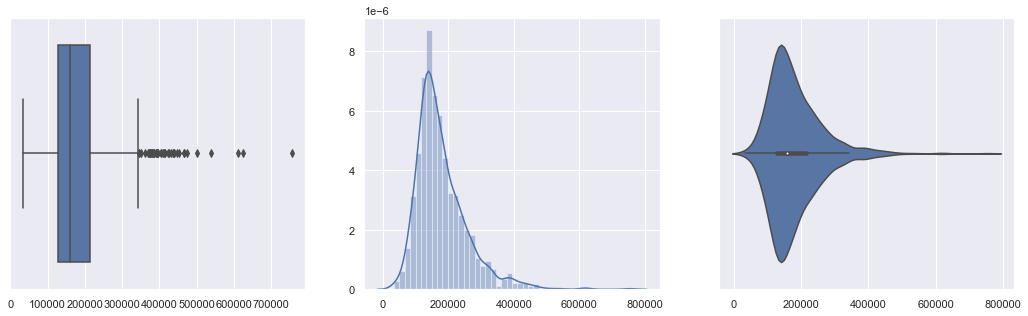

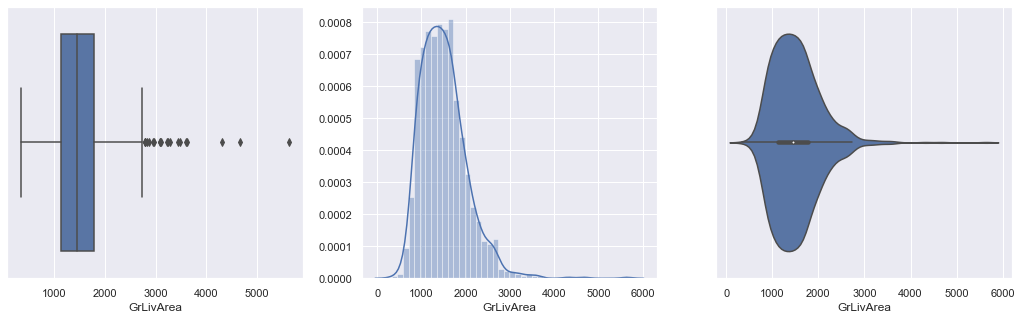

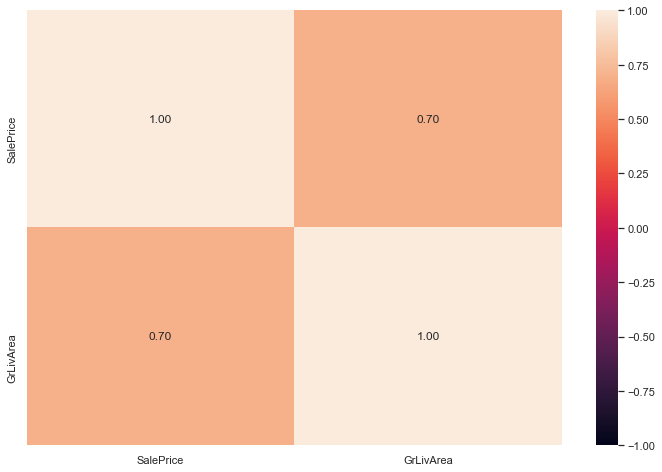

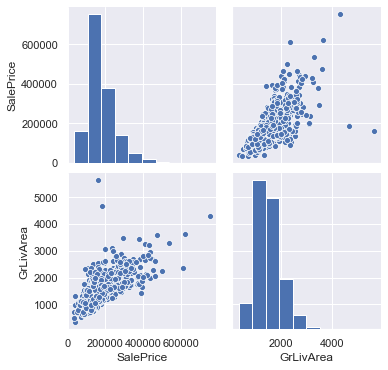

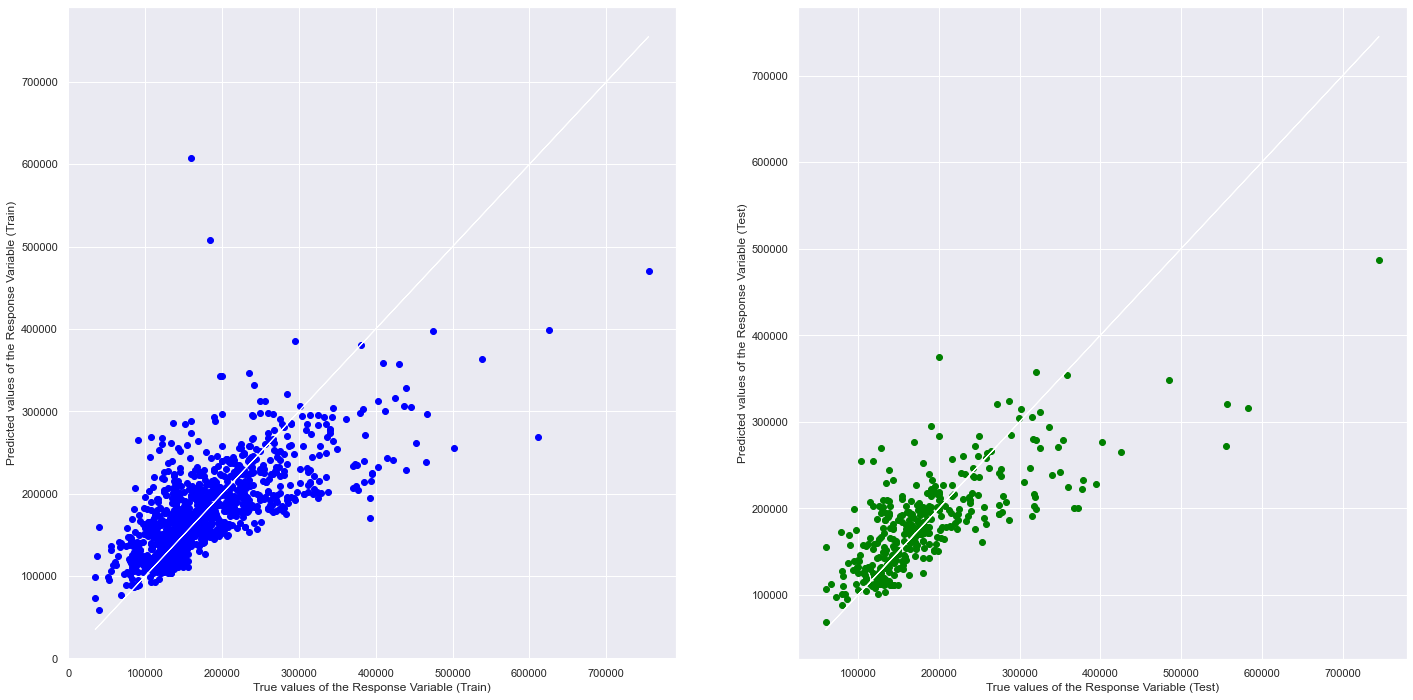

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4841904691985045
Mean Squared Error (MSE) 	: 3154813167.6760454

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5469842028501712
Mean Squared Error (MSE) 	: 3109240960.466817



In [4]:
x = ['GrLivArea']
regression('SalePrice',x,0.25)

Intercept of Regression 	: b =  [-16664.27809911]
Coefficients of Regression 	: a =  [[ 64.19150945 109.06088354  46.2727457   -0.10952197]]



,Predictors,Coefficients
0,GrLivArea,64.191509
1,GarageArea,109.060884
2,TotalBsmtSF,46.272746
3,LotArea,-0.109522


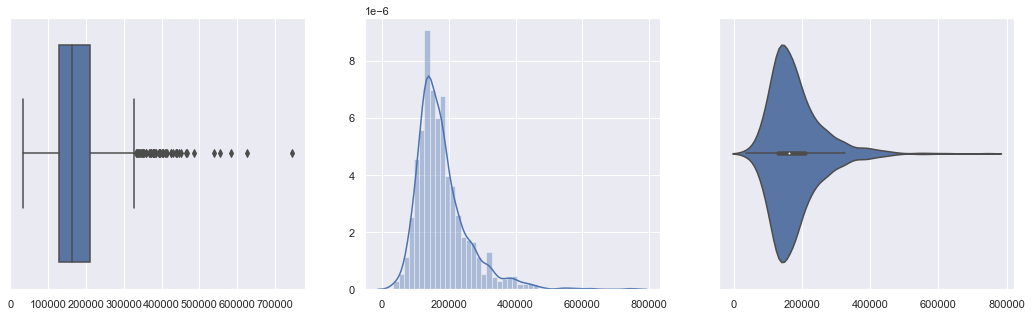

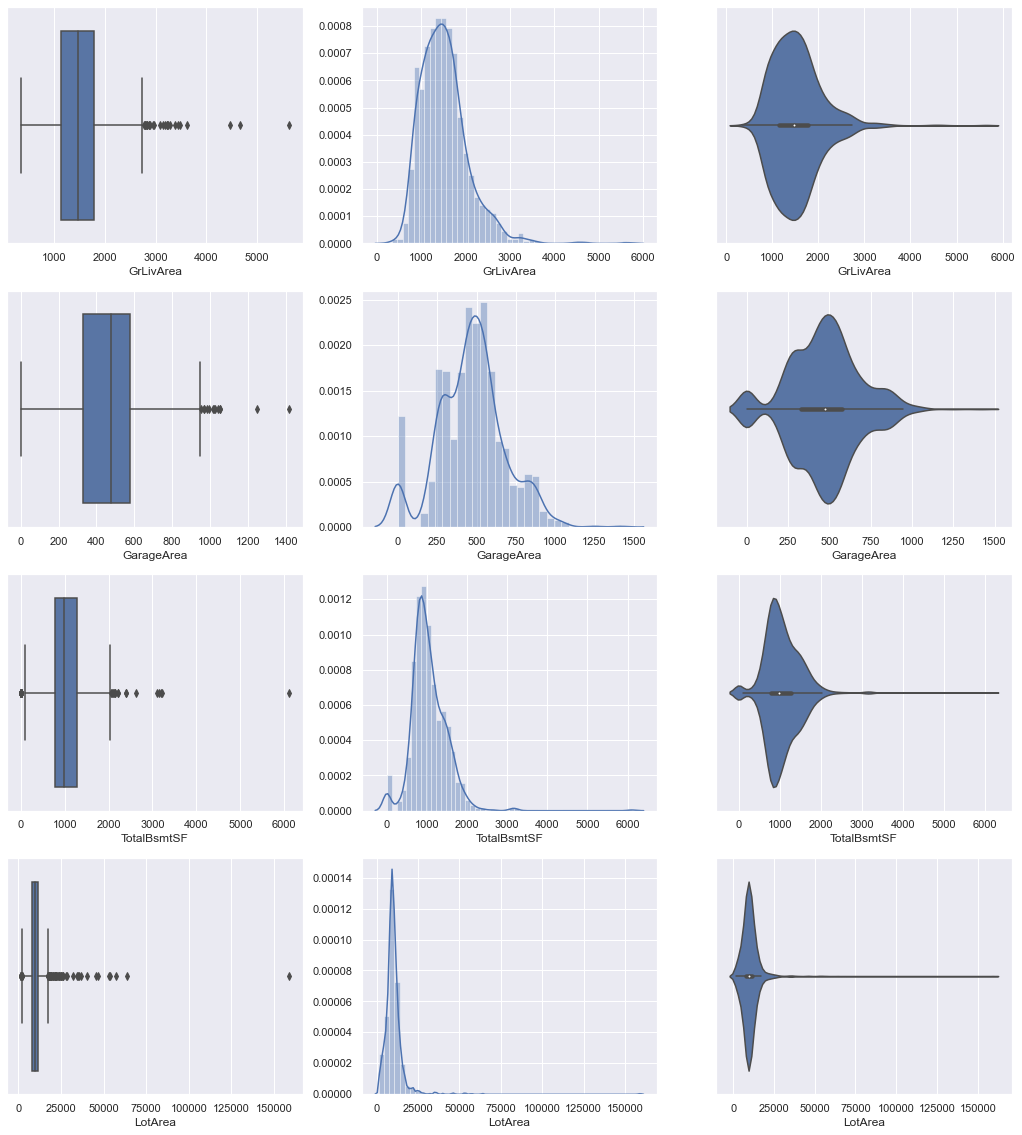

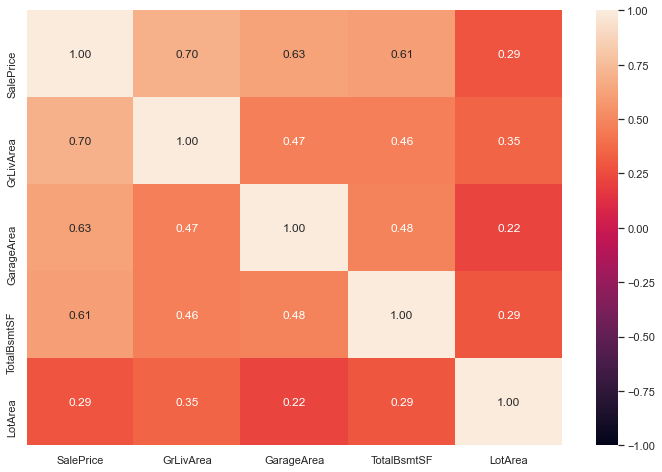

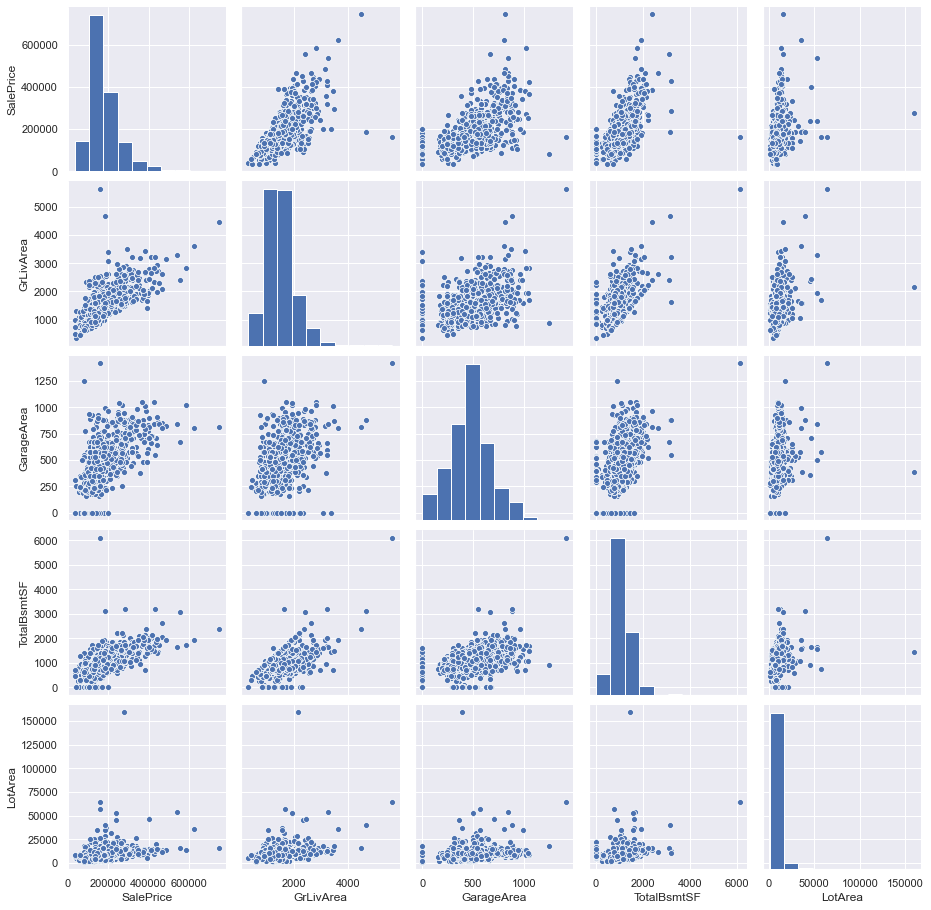

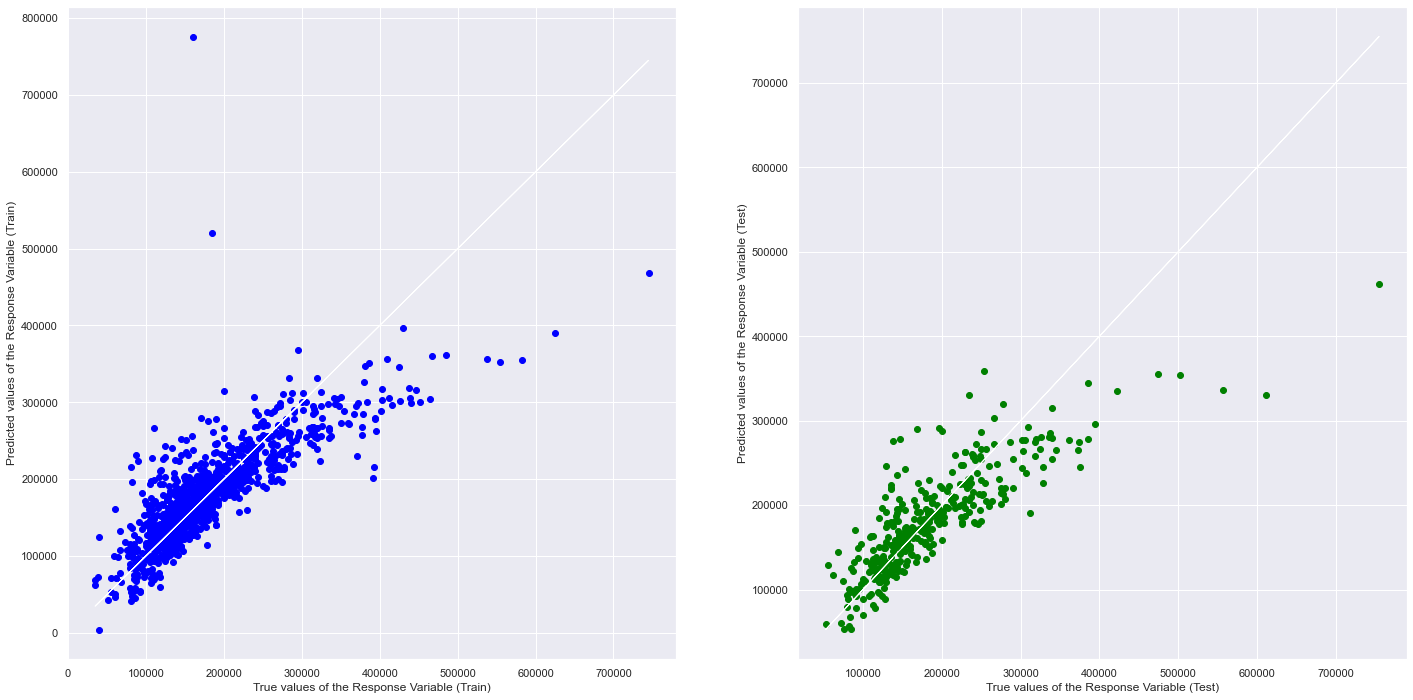

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.64878713369084
Mean Squared Error (MSE) 	: 2120351732.32246

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6866477997736979
Mean Squared Error (MSE) 	: 2222461123.178232



In [5]:
x = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
regression('SalePrice',x,0.25)